In [255]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
import glob

In [256]:
data_folder = 'sun_azimuth/'
az_files = glob.glob(data_folder + "sun*") #This command grabs all of the
#files starting with "sun_az" in your data folder.
az_files.sort()

In [257]:
print(data_folder)
print(az_files)

sun_azimuth/
['sun_azimuth/sun-1_0.dat', 'sun_azimuth/sun-2_0.dat', 'sun_azimuth/sun-3_0.dat', 'sun_azimuth/sun-4_0.dat', 'sun_azimuth/sun-5_0.dat', 'sun_azimuth/sun-6_0.dat', 'sun_azimuth/sun-7_0.dat', 'sun_azimuth/sun-8_0.dat', 'sun_azimuth/sun-9_0.dat', 'sun_azimuth/sun0_0.dat', 'sun_azimuth/sun1_0.dat', 'sun_azimuth/sun2_0.dat', 'sun_azimuth/sun3_0.dat', 'sun_azimuth/sun4_0.dat', 'sun_azimuth/sun5_0.dat', 'sun_azimuth/sun6_0.dat', 'sun_azimuth/sun7_0.dat', 'sun_azimuth/sun8_0.dat', 'sun_azimuth/sun901_0.dat', 'sun_azimuth/sun910_0.dat']


In [291]:
az_spectra = [] 
# Create an empty array to later hold each of the 
#spectra from the azimuthal scans

for az_file in az_files: 
    #Pull each individual filename from the list of azimuth files
    
    with open(az_file) as az_data: 
        #This opens up the file and puts each line into a list called 
        #az_data
        
        spectrum_rows = []    # We create a new empty list to put the 
        #rows with our spectral data into.
        
        for j, row in enumerate(az_data, start=1): # enumerate() works 
            #a lot like range(). You get an index (j, here) which is 
            #iterated over, but you also get an object (row) 
            #corresponding to the items in the list you're iterating 
            #over (that is, inside this loop, row is the same as 
            #az_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. 
                #It returns the remainder of a division (e.g. 6%4=2).
                #So, by checking when j%4 is zero, we get every fourth 
                #row in the data (which is where our spectral data is).
                spectrum_rows.append(row) # Throw every fourth row into 
                #our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings.
            #To break them up, we use the split() command, which splits
            #a string into a list by grabbing each segment separated by
            #the delimiter you put in the parentheses (e.g. If you do
            #'abc def ghi'.split(' '), you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of your
                #split list.
                if val != '' and val != '\n': 
                    # This excludes some "nonsense" cases where 
                    #elements in your split list are empty strings 
                    #or end-of-line characters
                    spec.append(val) 
                    #Throw the values that are actually fluxes 
                    #into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) 
            # Add the data from the current row to your total 
            #spectral data for this file.
            
        az_spectra.append(tot_spectrum)
        


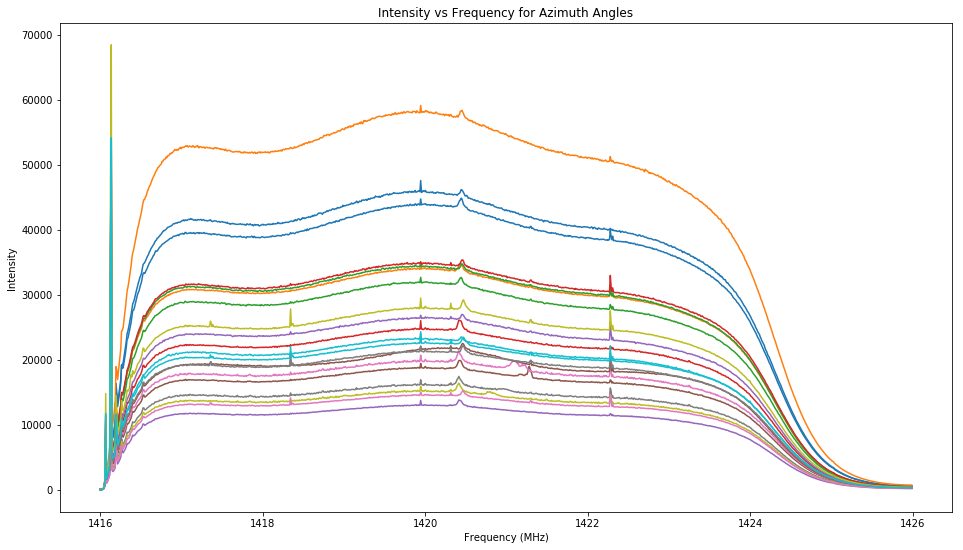

1417.0058979999897
1423.3244999999247


In [292]:
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
for i in range (0,20):
    plt.plot(freq,az_spectra[i])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for Azimuth Angles")
plt.show()
print(freq[103])
print(freq[750])

In [293]:
az_spectra_sum = np.zeros(20)
for i in range (0,20):
    az_spectra_sum[i] = sum(az_spectra[i][103:750])

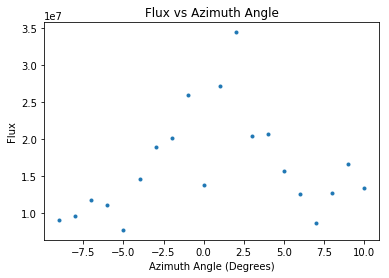

In [294]:
x = [-1,-2,-3,-4,-5,-6,-7,-8,-9,0,1,2,3,4,5,6,7,8,9,10]
#x = np.array(x)
plt.plot(x,az_spectra_sum, '.')
plt.xlabel("Azimuth Angle (Degrees)")
plt.ylabel("Flux")
plt.title("Flux vs Azimuth Angle")
plt.show()

In [295]:
from scipy.optimize import curve_fit 
import math
def func (x,a,b,c):
    return a/(c*(2*np.pi)**.5)*np.exp(-.5*((x-b)/c)**2)


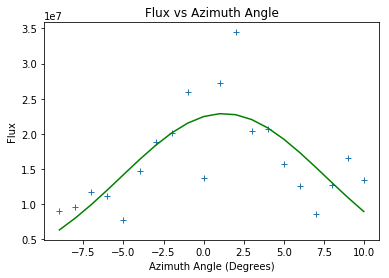

Amplitude = 366111932.83608943, Center = 1.2443176901451953, Standard Deviation = 6.383115327082253
Full Width Half Max = 15.031087921957573 Degrees


In [298]:
at,bt,ct = (350000000,0,5)
coeffs, fiterr = curve_fit(func, np.array(x), az_spectra_sum, 
                           p0=(at,bt,ct))
plt.plot(np.array(x),az_spectra_sum, '+')
plt.plot(np.sort(x),func(np.sort(x),*coeffs), 'g-')
plt.xlabel("Azimuth Angle (Degrees)")
plt.ylabel("Flux")
plt.title("Flux vs Azimuth Angle")
plt.show()
print ("Amplitude = %s, Center = %s, Standard Deviation = %s" % 
       (coeffs[0], coeffs[1], coeffs[2]))
print ("Full Width Half Max = %s Degrees" %(2*(2*np.log(2))**.5*coeffs[2]))

In [264]:
data_folder = 'sun_elevation/'
el_files = glob.glob(data_folder + "sun*") 
#This command grabs all of the files starting with 
#"sun_az" in your data folder.
el_files.sort()

In [265]:
print(data_folder)
print(el_files)

sun_elevation/
['sun_elevation/sun_el_m1', 'sun_elevation/sun_el_m2', 'sun_elevation/sun_el_m3', 'sun_elevation/sun_el_m4', 'sun_elevation/sun_el_m5', 'sun_elevation/sun_el_p1', 'sun_elevation/sun_el_p10', 'sun_elevation/sun_el_p2', 'sun_elevation/sun_el_p3', 'sun_elevation/sun_el_p4', 'sun_elevation/sun_el_p5', 'sun_elevation/sun_el_p6', 'sun_elevation/sun_el_p7', 'sun_elevation/sun_el_p8', 'sun_elevation/sun_el_p9']


In [299]:
el_spectra = [] 
# Create an empty array to later hold each of the spectra 
#from the elevation scans

for el_file in el_files: 
    #Pull each individual filename from the list of elevation files
    
    with open(el_file) as el_data: 
        #This opens up the file and puts each line into a list 
        #called el_data
        
        spectrum_rows = []    
        # We create a new empty list to put the rows with 
        #our spectral data into.
        
        for j, row in enumerate(el_data, start=1): 
            # enumerate() works a lot like range(). 
            #You get an index (j, here) which is iterated over, 
            #but you also get an object (row) corresponding to the 
            #items in the list you're iterating over 
            #(that is, inside this loop, row is the same as el_data[j])
            if j%4 == 0: # The operator "%" is called the modulus. 
                #It returns the remainder of a division (e.g. 6%4=2). 
                #So, by checking when j%4 is zero, we get every fourth 
                #row in the data (which is where our spectral data is).
                spectrum_rows.append(row) 
                # Throw every fourth row into our list of spectral data.
                
        tot_spectrum = np.zeros(1024) #Create an array of 1024 0's.
        for row in spectrum_rows: 
            temp_spec = row.split(' ') # Our rows are actually strings.
            #To break them up, we use the split() command, which splits
            #a string into a list by grabbing each segment separated by
            #the delimiter you put in the parentheses 
            #(e.g. If you do 'abc def ghi'.split(' '), 
            #you'll get the list [abc,def,ghi])
            spec = [] # Create an empty list to hold the spectral data
            for val in temp_spec: # Iterate over the elements of 
                #your split list.
                if val != '' and val != '\n': # This excludes some 
                    #"nonsense" cases where elements in your split list 
                    #are empty strings or end-of-line characters
                    spec.append(val) #Throw the values that are 
                    #actually fluxes into your spectrum array.
                    
                    
            tot_spectrum = tot_spectrum + np.float64(spec) 
            # Add the data from the current row to your total spectral 
            #data for this file.
            
        el_spectra.append(tot_spectrum)
        


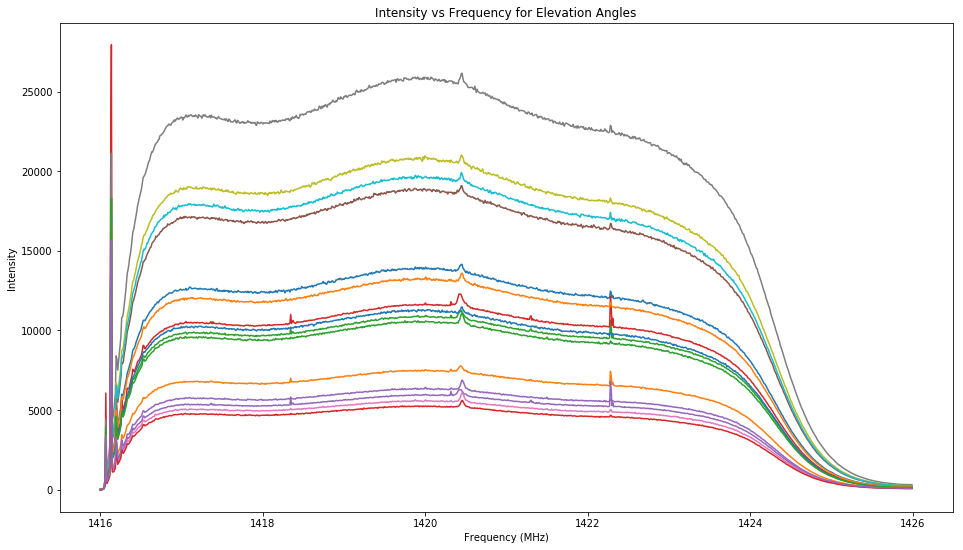

1417.0058979999897
1423.3244999999247


In [275]:
freq = np.arange(1416, 1426, 0.009766)
plt.figure(figsize=(16,9))
for i in range (0,15):
    plt.plot(freq,el_spectra[i])
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity")
plt.title("Intensity vs Frequency for Elevation Angles")
plt.show()
print(freq[103])
print(freq[750])

In [300]:
el_spectra_sum = np.zeros(15)
for i in range (0,15):
    el_spectra_sum[i] = sum(el_spectra[i][103:750])

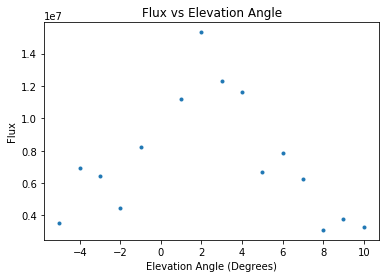

In [301]:
x = [-1,-2,-3,-4,-5,1,10,2,3,4,5,6,7,8,9]
plt.plot(x,el_spectra_sum, '.')
plt.xlabel("Elevation Angle (Degrees)")
plt.ylabel("Flux")
plt.title("Flux vs Elevation Angle")
plt.show()

In [302]:
from scipy.optimize import curve_fit 
import math
def func (x,a,b,c):
    return a/(c*(2*np.pi)**.5)*np.exp(-.5*((x-b)/c)**2)


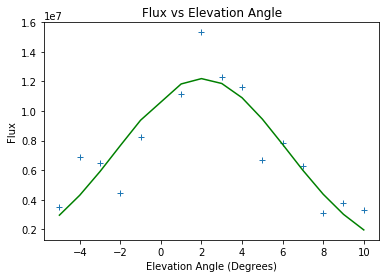

Amplitude = 127557853.57350563, Center = 2.0237601706471375, Standard Deviation = 4.176206449379842
Full Width Half Max = 9.83421465918718 Degrees


In [303]:
at,bt,ct = (140000000,0,5)
coeffs, fiterr = curve_fit(func, np.array(x), el_spectra_sum, 
                           p0=(at,bt,ct))
plt.plot(np.array(x),el_spectra_sum, '+')
plt.plot(np.sort(x),func(np.sort(x),*coeffs), 'g-')
plt.xlabel("Elevation Angle (Degrees)")
plt.ylabel("Flux")
plt.title("Flux vs Elevation Angle")
plt.show()
print ("Amplitude = %s, Center = %s, Standard Deviation = %s" % 
       (coeffs[0], coeffs[1], coeffs[2]))
print ("Full Width Half Max = %s Degrees" %(2*(2*np.log(2))**.5*coeffs[2]))